# Import Packages & Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
pd.set_option('display.max_columns',40)

In [4]:
#read assessment data from the sheet named "Data"
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Maybank Assessment.xlsx',sheet_name="Data")

# EDA

## Understand Data

In [5]:
data.head()

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
0,1443,65,Masters,EXECUTIVE CONDOMINIUM,19250.0,6.0,PMEB,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,NaN,NaN,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,AFFLUENT
1,1559,86,O-Levels,PRIVATE CONDOMINIUM,99018.0,2.0,PMEB,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,NaN,NaN,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,AFFLUENT
2,1913,69,A-Levels,NaN,10155.0,3.0,PMEB,4,1.0,5420.09,5420.09,5420.09,4.106600e-01,NaN,NaN,64161.74,NaN,NaN,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,AFFLUENT
3,2032,70,NaN,NaN,21863.0,2.0,RETIREE,3,1.0,13596.65,13596.65,13596.65,5.397180e+03,NaN,NaN,39792.30,NaN,NaN,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
4,2048,72,O-Levels,EXECUTIVE CONDOMINIUM,10641.0,NaN,BLUE COLLAR,4,2.0,51639.18,32689.93,18949.25,3.607580e+03,NaN,NaN,67258.47,NaN,NaN,NaN,15060.339167,15619.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT


In [6]:
data.tail()

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
66078,22522,41,NaN,NaN,70449.0,NaN,BLUE COLLAR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66079,22549,39,NaN,NaN,96290.0,4.0,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66080,22576,50,NaN,NaN,69597.0,6.0,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.0,285999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66081,22577,34,PHD/Doctorate,SHOPHOUSE,48271.0,5.0,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,480.504167,6062.29,6062.29,505.190833,6062.29,13.0,20000.0,NORMAL
66082,22584,39,NaN,NaN,0.0,NaN,OTHERS,2,1.0,1417.92,1417.92,1417.92,1500.0,NaN,NaN,1417.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL


In [7]:
data.columns

Index(['C_ID', 'C_AGE', 'C_EDU', 'C_HSE', 'PC', 'INCM_TYP', 'gn_occ',
       'NUM_PRD', 'CASATD_CNT', 'MTHCASA', 'MAXCASA', 'MINCASA', 'DRvCR',
       'MTHTD', 'MAXTD', 'Asset value', 'HL_tag', 'AL_tag', 'pur_price_avg',
       'UT_AVE', 'MAXUT', 'N_FUNDS', 'CC_AVE', 'MAX_MTH_TRN_AMT',
       'MIN_MTH_TRN_AMT', 'AVG_TRN_AMT', 'ANN_TRN_AMT', 'ANN_N_TRX', 'CC_LMT',
       'C_seg'],
      dtype='object')

In [8]:
data.shape

(66083, 30)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66083 entries, 0 to 66082
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   C_ID             66083 non-null  int64  
 1   C_AGE            66083 non-null  int64  
 2   C_EDU            27619 non-null  object 
 3   C_HSE            22167 non-null  object 
 4   PC               65597 non-null  float64
 5   INCM_TYP         36617 non-null  float64
 6   gn_occ           65205 non-null  object 
 7   NUM_PRD          66083 non-null  int64  
 8   CASATD_CNT       40991 non-null  float64
 9   MTHCASA          39045 non-null  float64
 10  MAXCASA          39045 non-null  float64
 11  MINCASA          39045 non-null  float64
 12  DRvCR            29708 non-null  float64
 13  MTHTD            14100 non-null  float64
 14  MAXTD            14100 non-null  float64
 15  Asset value      66083 non-null  float64
 16  HL_tag           2368 non-null   float64
 17  AL_tag      

In [10]:
data.isna().sum()

C_ID                   0
C_AGE                  0
C_EDU              38464
C_HSE              43916
PC                   486
INCM_TYP           29466
gn_occ               878
NUM_PRD                0
CASATD_CNT         25092
MTHCASA            27038
MAXCASA            27038
MINCASA            27038
DRvCR              36375
MTHTD              51983
MAXTD              51983
Asset value            0
HL_tag             63715
AL_tag             60496
pur_price_avg      60498
UT_AVE             63405
MAXUT              63405
N_FUNDS            63405
CC_AVE             49010
MAX_MTH_TRN_AMT    54350
MIN_MTH_TRN_AMT    54350
AVG_TRN_AMT        54350
ANN_TRN_AMT        54350
ANN_N_TRX          54350
CC_LMT             18339
C_seg                  0
dtype: int64

## Cleaning Data

### Remove Duplicate Customer IDs

In [11]:
data['C_ID'].duplicated().sum()

18226

Remove the duplicated customers by customer id.

In [12]:
data = data[~data['C_ID'].duplicated()]

In [13]:
data.shape

(47857, 30)

### Choose Relevant Columns For Further Analysis

Choose only the relevant columns that would be useful for further analysis and modeling to identify the potential affluent customers.

In [14]:
data = data[['C_ID', 'C_AGE', 'INCM_TYP', 'NUM_PRD', 'MTHCASA','AVG_TRN_AMT','ANN_N_TRX', 'Asset value', 'HL_tag', 'AL_tag', 'UT_AVE',  'CC_LMT', 'C_seg']]

### Data Anomalies

There are a few data anomalies identified with respect to the data and the given task;
- Remove extreme ages that wouldn't contribute much towards the analysis.

In [15]:
(data['C_AGE'].min(),data['C_AGE'].max())

(2, 122)

In [16]:
# Excluding extreme age windows
data = data[(data['C_AGE']>=20) & (data['C_AGE']<=90)]

In [17]:
data.shape

(47587, 13)

### Data Type conversion

Data types of the features are very important for further analysis. Convert INCM_TYP into string type.

In [18]:
data['INCM_TYP'] = data['INCM_TYP'].astype(str)

### Understand INCM_TYP data

Identify which INCM_TYP code indicates higher income value.

In [19]:
result = data.groupby('INCM_TYP')['C_seg'].value_counts().unstack(fill_value=0)
result.columns.name = None
result = result.reset_index()
result['RATIO'] = result['AFFLUENT']/(result['NORMAL']+result['AFFLUENT'])
result

,INCM_TYP,AFFLUENT,NORMAL,RATIO
0,1.0,401,1360,0.227712
1,2.0,990,5487,0.152849
2,3.0,700,3185,0.180180
3,4.0,745,3479,0.176373
4,5.0,857,3459,0.198563
5,6.0,940,3779,0.199195
6,7.0,112,626,0.151762
7,8.0,43,169,0.202830
8,nan,5534,15721,0.260362


In [20]:
result = data.groupby('INCM_TYP')[['AVG_TRN_AMT','ANN_N_TRX','MTHCASA']].mean()
result.columns.name = None
result = result.reset_index()
result

,INCM_TYP,AVG_TRN_AMT,ANN_N_TRX,MTHCASA
0,1.0,413.995126,47.833333,15388.542287
1,2.0,500.922543,54.591867,13753.208078
2,3.0,597.708632,56.143305,19046.637663
3,4.0,790.362768,67.046003,16926.226409
4,5.0,840.679668,69.828410,17738.550460
5,6.0,1364.798561,77.459748,21369.193505
6,7.0,2887.399299,87.730088,25701.329674
7,8.0,3882.750352,81.333333,54810.438072
8,nan,283.900863,64.778169,16883.795390


<Axes: xlabel='INCM_TYP', ylabel='AVG_TRN_AMT'>

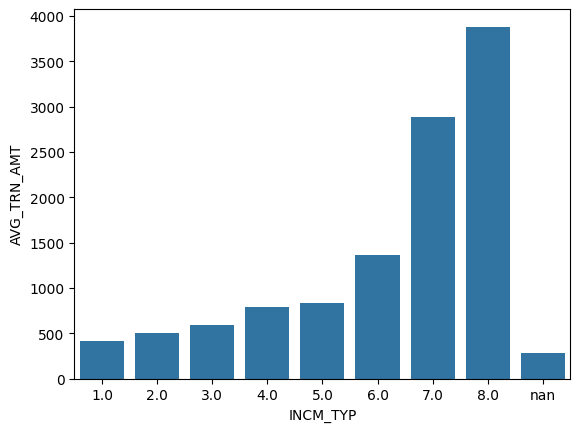

In [21]:
sns.barplot(x="INCM_TYP", y="AVG_TRN_AMT", data=result)

From the above results, it's safe to assume that the higher the income level code is, higher the magnitude of income is.

### Univariate Analysis

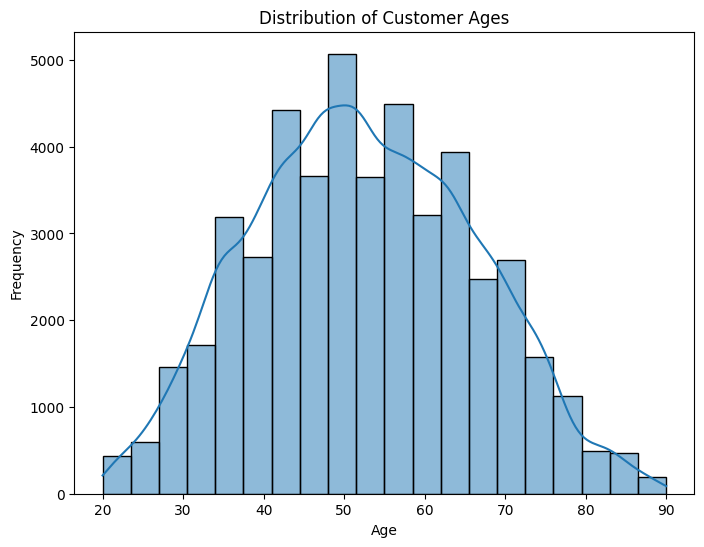

In [22]:
# a. Distribution of customer ages (C_AGE)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='C_AGE', bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

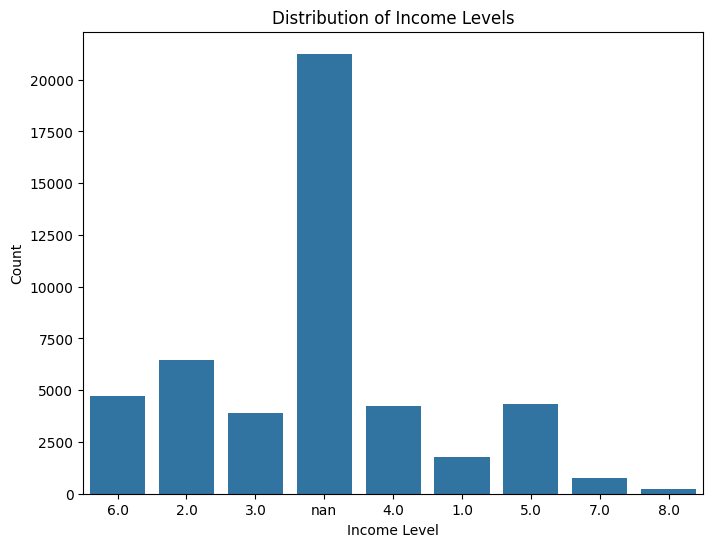

In [23]:
# b. Distribution of income levels (INCM_TYP)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='INCM_TYP')
plt.title('Distribution of Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

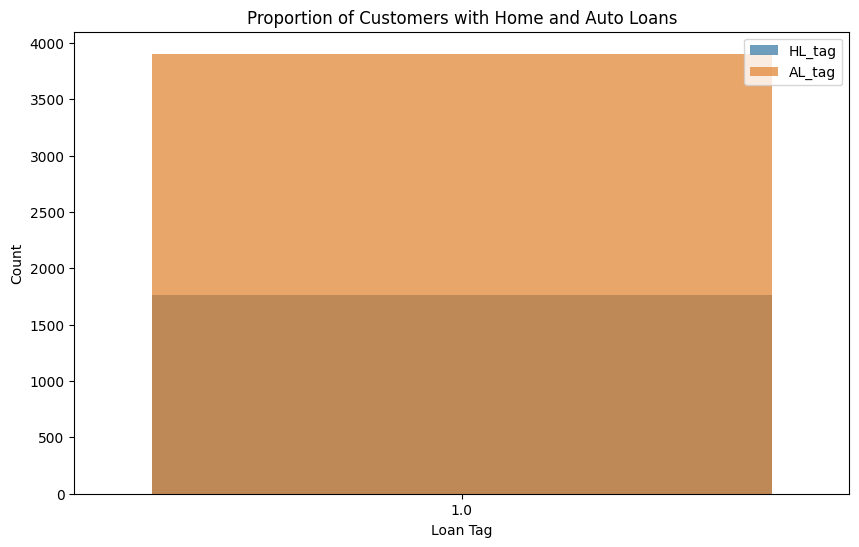

In [24]:
# e. Proportion of customers with home loans (HL_tag) & auto loans (AL_tag)
loan_tags = ['HL_tag', 'AL_tag']
plt.figure(figsize=(10, 6))
for tag in loan_tags:
    sns.countplot(data=data, x=tag, alpha=0.7, label=tag)
plt.title('Proportion of Customers with Home and Auto Loans')
plt.xlabel('Loan Tag')
plt.ylabel('Count')
plt.legend()
plt.show()

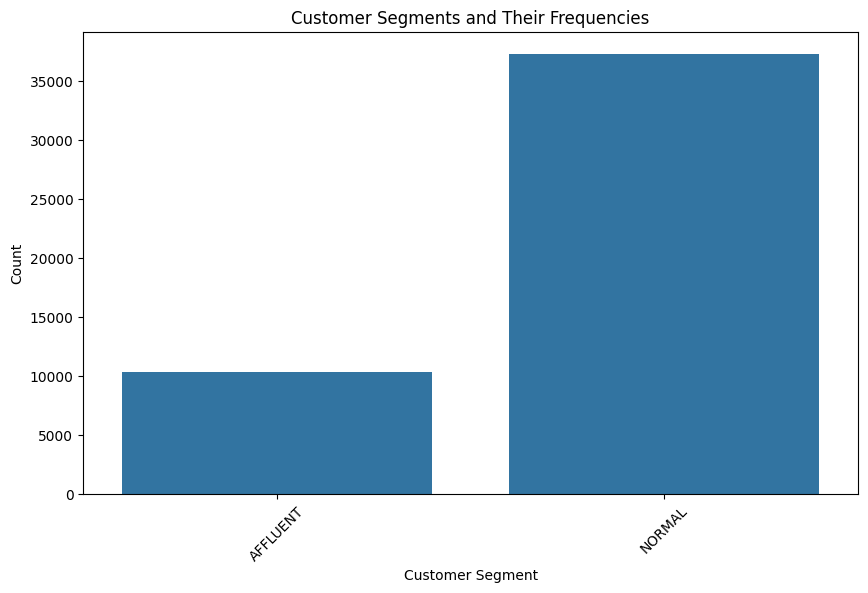

In [25]:
# f. Frequencies of different customer segments (C_seg)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='C_seg')
plt.title('Customer Segments and Their Frequencies')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Multivariate Analysis

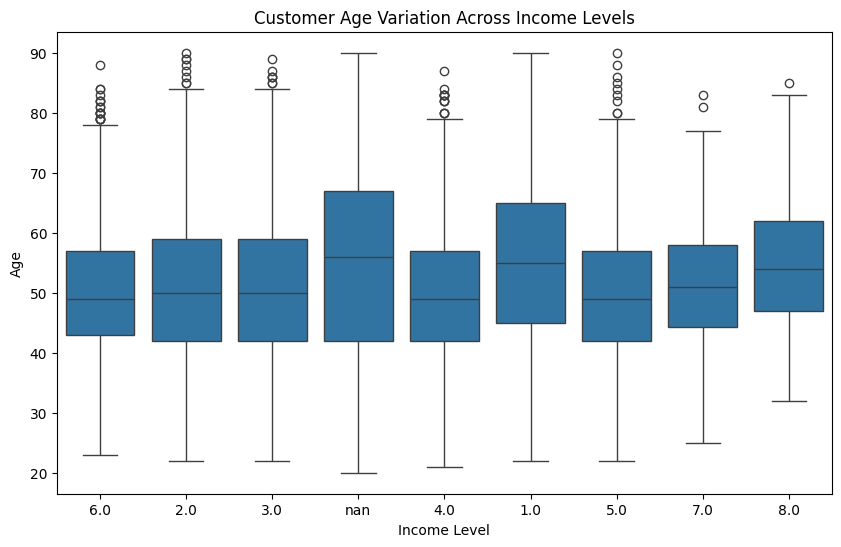

In [26]:
# a. Customer age (C_AGE) across different income levels (INCM_TYP)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='INCM_TYP', y='C_AGE')
plt.title('Customer Age Variation Across Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Age')
plt.show()

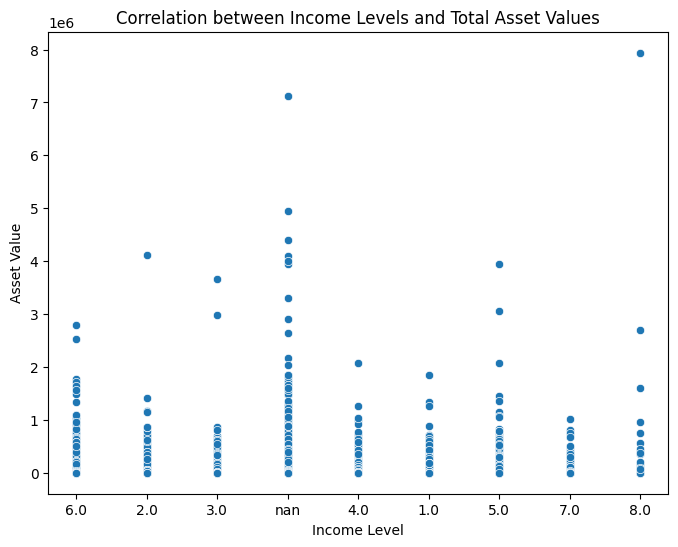

In [27]:
# b. Correlation between income levels (INCM_TYP) and total asset values (Asset value)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='INCM_TYP', y='Asset value')
plt.title('Correlation between Income Levels and Total Asset Values')
plt.xlabel('Income Level')
plt.ylabel('Asset Value')
plt.show()

<ipython-input-28-a138ed1263d2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='C_seg', y='MTHCASA', ci=None)


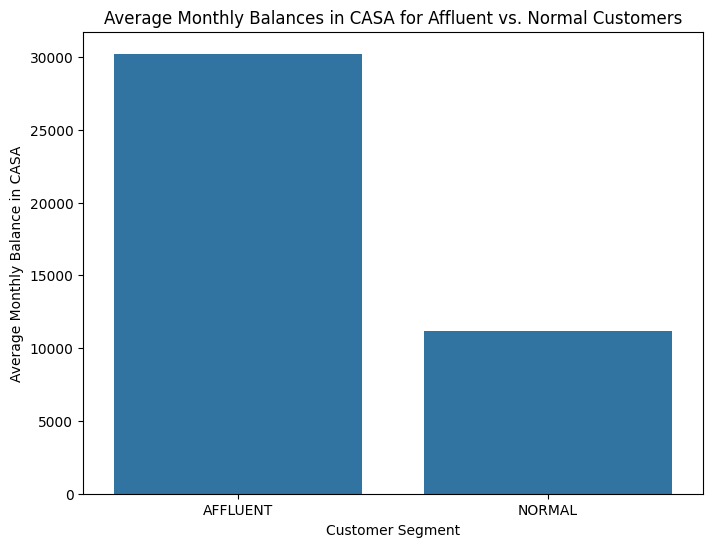

In [28]:
# c. Average monthly balances in CASA (MTHCASA) for affluent vs. normal customers (C_seg)
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='C_seg', y='MTHCASA', ci=None)
plt.title('Average Monthly Balances in CASA for Affluent vs. Normal Customers')
plt.xlabel('Customer Segment')
plt.ylabel('Average Monthly Balance in CASA')
plt.show()

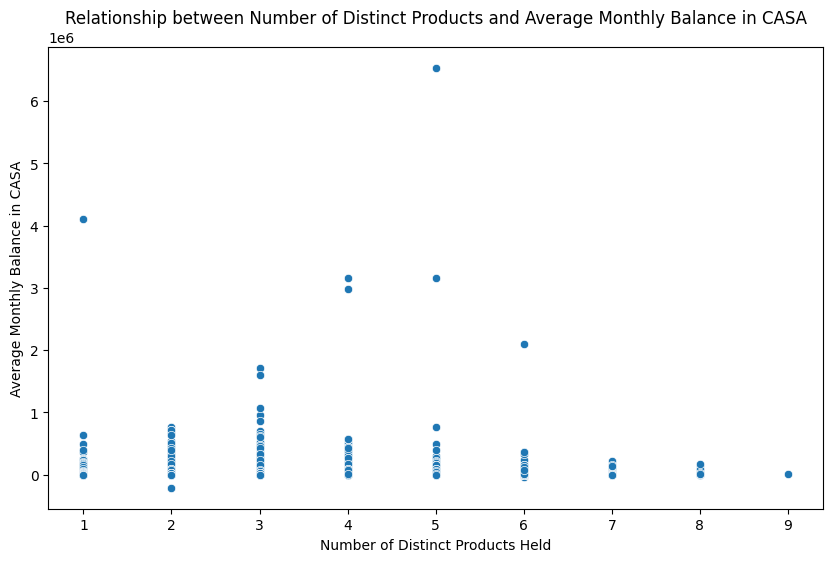

In [29]:
# d. Relationship between number of distinct products (NUM_PRD) and average monthly balance in CASA (MTHCASA)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='NUM_PRD', y='MTHCASA')
plt.title('Relationship between Number of Distinct Products and Average Monthly Balance in CASA')
plt.xlabel('Number of Distinct Products Held')
plt.ylabel('Average Monthly Balance in CASA')
plt.show()

In [30]:
data.columns

Index(['C_ID', 'C_AGE', 'INCM_TYP', 'NUM_PRD', 'MTHCASA', 'AVG_TRN_AMT',
       'ANN_N_TRX', 'Asset value', 'HL_tag', 'AL_tag', 'UT_AVE', 'CC_LMT',
       'C_seg'],
      dtype='object')

# Data Pre-processing

After analysing the data set, Income level code 2.0 has the most frequency. Hence we will impute the data accordingly.

In [32]:
data['INCM_TYP'].replace(to_replace='nan',value='2.0',inplace=True)

In [33]:
data.isnull().sum()

C_ID               0
C_AGE              0
INCM_TYP           0
NUM_PRD            0
MTHCASA        18676
AVG_TRN_AMT    39124
ANN_N_TRX      39124
Asset value        0
HL_tag         45821
AL_tag         43684
UT_AVE         45268
CC_LMT         12952
C_seg              0
dtype: int64

In [34]:
median_value_casa = data['MTHCASA'].median()
median_value_trn = data['AVG_TRN_AMT'].median()
median_value_ut = data['UT_AVE'].median()
median_value_cc = data['CC_LMT'].median()

In [35]:
data['MTHCASA'].fillna(value=median_value_casa,inplace=True)
data['AVG_TRN_AMT'].fillna(value=median_value_trn,inplace=True)
data['HL_tag'].fillna(value=0,inplace=True)
data['AL_tag'].fillna(value=0,inplace=True)
data['UT_AVE'].fillna(value=median_value_ut,inplace=True)
data['CC_LMT'].fillna(value=median_value_cc,inplace=True)

Fill the null values by imputing the median value for the columns with missing values.

# Ensemble Model - Random Forest Classifier

In [48]:
X = data[['C_AGE', 'INCM_TYP', 'NUM_PRD', 'MTHCASA', 'AVG_TRN_AMT',
       'Asset value', 'HL_tag', 'AL_tag', 'UT_AVE', 'CC_LMT']]
y = data[['C_seg']]
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Training the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

<ipython-input-37-ba284b01bc2b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


In [38]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8374658541710444
Classification Report:
              precision    recall  f1-score   support

    AFFLUENT       0.64      0.57      0.60      2073
      NORMAL       0.88      0.91      0.90      7445

    accuracy                           0.84      9518
   macro avg       0.76      0.74      0.75      9518
weighted avg       0.83      0.84      0.83      9518



In [39]:
df_proba = pd.DataFrame(rf_classifier.predict_proba(X_test))

In [40]:
y_test['C_seg'].value_counts()

NORMAL      7445
AFFLUENT    2073
Name: C_seg, dtype: int64

In [41]:
filter_df_proba = df_proba[(df_proba[1]>0.45) & (df_proba[1]<0.5)]

In [42]:
filter = pd.concat([data,filter_df_proba],axis=1)
dummy = filter[filter[1]>0]

In [43]:
dummy.describe()

,C_ID,C_AGE,NUM_PRD,MTHCASA,AVG_TRN_AMT,ANN_N_TRX,Asset value,HL_tag,AL_tag,UT_AVE,CC_LMT,0,1
count,182.000000,182.000000,182.000000,182.000000,182.000000,31.000000,1.820000e+02,182.000000,182.000000,182.000000,182.000000,188.000000,188.000000
mean,44144.835165,57.428571,3.186813,34121.120824,389.255971,64.064516,1.200893e+05,0.043956,0.027473,36070.542514,2863.186813,0.524833,0.475167
std,27150.936139,13.771331,1.242988,72489.792630,314.788685,88.296823,1.416390e+05,0.205563,0.163907,12405.996524,7807.909063,0.011735,0.011735
min,1123.000000,26.000000,1.000000,158.760000,0.625000,1.000000,0.000000e+00,0.000000,0.000000,11546.666667,0.000000,0.500373,0.457157
25%,21313.500000,46.250000,2.000000,4692.320000,335.288333,6.000000,2.833340e+04,0.000000,0.000000,34303.409167,0.000000,0.512945,0.460000
50%,42332.000000,58.000000,3.000000,11055.370000,335.288333,17.000000,7.482695e+04,0.000000,0.000000,34303.409167,0.000000,0.520000,0.480000
75%,63819.500000,67.750000,4.000000,33194.190000,335.288333,74.000000,1.642858e+05,0.000000,0.000000,34303.409167,0.000000,0.540000,0.487055
max,99931.000000,89.000000,8.000000,655579.440000,2664.475000,274.000000,1.023273e+06,1.000000,1.000000,138265.501670,59000.000000,0.542843,0.499627


The above description of the data set signifies higher the customer age has a better probability of being a potential affluent customer.
- Average of 57
- Average monthly savings amounting to 34000 approximately.
- The loan doesn't hold a strong relation in identifying potential affluent customer.
- Customers holding 3 or more products with the bank.
- Customers with average credit card limit as 2900.

## Neural Network CLassifier

In [52]:
y_train['C_seg'] = y_train['C_seg'].apply(lambda x: 0 if x =='AFFLUENT' else 1)
y_train

,C_seg
24229,1
14907,1
13511,1
46282,1
14408,1
...,...
12043,1
60078,1
48691,1
867,0


In [60]:
y_test['C_seg'] = y_test['C_seg'].apply(lambda x: 0 if x =='AFFLUENT' else 1)
y_test

,C_seg
44648,1
42615,1
39103,1
15761,1
31244,1
...,...
62869,1
9632,0
29376,1
30420,1


In [53]:
y_train.isnull().sum()

C_seg    0
dtype: int64

In [61]:
y_test.isnull().sum()

C_seg    0
dtype: int64

In [63]:
# Define the logistic regression neural network model
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_train1 =  tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train1 = tf.convert_to_tensor(y_train, dtype=tf.float32)

X_test1 = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test1 = tf.convert_to_tensor(y_test, dtype=tf.float32)
# Train the model
history = model.fit(X_train1, y_train1, epochs=50, batch_size=32, validation_data=(X_test1, y_test1))

Epoch 1/50
1190/1190 [==============================] - 5s 4ms/step - loss: 3966.0188 - accuracy: 0.5756 - val_loss: 149.1358 - val_accuracy: 0.7786
Epoch 2/50
1190/1190 [==============================] - 4s 3ms/step - loss: 40.9615 - accuracy: 0.7687 - val_loss: 35.2014 - val_accuracy: 0.7553
Epoch 3/50
1190/1190 [==============================] - 4s 3ms/step - loss: 17.2009 - accuracy: 0.7660 - val_loss: 5.5679 - val_accuracy: 0.7399
Epoch 4/50
1190/1190 [==============================] - 3s 2ms/step - loss: 12.4315 - accuracy: 0.7572 - val_loss: 26.4549 - val_accuracy: 0.8199
Epoch 5/50
1190/1190 [==============================] - 3s 2ms/step - loss: 10.8295 - accuracy: 0.7601 - val_loss: 4.9456 - val_accuracy: 0.5071
Epoch 6/50
1190/1190 [==============================] - 3s 2ms/step - loss: 13.2847 - accuracy: 0.7616 - val_loss: 21.7034 - val_accuracy: 0.7812
Epoch 7/50
1190/1190 [==============================] - 3s 3ms/step - loss: 12.6599 - accuracy: 0.7559 - val_loss: 7.6666 -

In [64]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test1, y_test1)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

298/298 [==============================] - 1s 3ms/step - loss: 3.4741 - accuracy: 0.8235
Test Loss: 3.4740593433380127
Test Accuracy: 0.8234923481941223


In [72]:
probabilities = model.predict(X_test1)

298/298 [==============================] - 1s 2ms/step


In [83]:
probabilities = np.asarray(probabilities)

In [85]:
df_proba_seq['Probabilities'] = probabilities

In [86]:
df_proba_seq

,C_AGE,INCM_TYP,NUM_PRD,MTHCASA,AVG_TRN_AMT,Asset value,HL_tag,AL_tag,UT_AVE,CC_LMT,C_seg,Probabilities
44648,28,4.0,2,4692.32,335.288333,0.00,0.0,1.0,34303.409167,0.0,1,1.000000
42615,47,4.0,3,1003.74,1797.241667,1003.74,0.0,0.0,34303.409167,9000.0,1,1.000000
39103,50,2.0,2,31.76,335.288333,31.76,0.0,0.0,34303.409167,0.0,1,1.000000
15761,51,2.0,1,4692.32,335.288333,13984.52,0.0,0.0,34303.409167,0.0,1,1.000000
31244,43,6.0,2,4692.32,7881.386667,0.00,0.0,0.0,34303.409167,27500.0,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
62869,41,6.0,2,4692.32,373.680000,0.00,0.0,1.0,34303.409167,32900.0,1,1.000000
9632,56,5.0,1,4692.32,335.288333,60000.00,0.0,0.0,34303.409167,0.0,0,1.000000
29376,80,2.0,1,4692.32,335.288333,0.00,0.0,0.0,34303.409167,0.0,1,1.000000
30420,52,2.0,3,398.47,335.288333,30398.47,0.0,0.0,34303.409167,0.0,1,0.999988


In [74]:
print(X_test1.shape)

(9518, 10)


In [ ]:
y_test['C_seg'].value_counts()

NORMAL      7445
AFFLUENT    2073
Name: C_seg, dtype: int64